In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

class PCA_scratch:

    def __init__(self, n_components, alpha_coef):
        self.n_components = n_components
        self.alpha_coef = alpha_coef
        self.__components = None
        self.__mean = None
        self.__eigenvalues = None
        
    def return_components(self):
        return self.__components
    
    def return_eigenvalues(self):
        return self.__eigenvalues
    
    def fit(self, X):
        # Mean centering
        self.__mean = np.mean(X, axis=0)
        X = X - self.__mean
        # covariance, function needs samples as columns
        cov = np.cov(X.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        dispersion = self.count_dispersion(eigenvalues)
        r = np.where(dispersion >= self.alpha_coef)[0][0] + 1
        self.__eigenvalues = eigenvalues
        self.__components = eigenvectors[:r, :]

    def count_dispersion(self, eigenvalues):
        f_r = np.zeros(len(eigenvalues))
        for r in range(len(eigenvalues)):
            f_r[r] = np.sum(eigenvalues[: r+1]) / np.sum(eigenvalues)
        return f_r
    
    def transform(self, X):
        # project data
        X = X - self.__mean
        return np.dot(X, self.__components.T)

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary principal components
pca = PCA_scratch(2, 0.95)
pca.fit(X)
X_projected = pca.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
        c=y, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


<Figure size 640x480 with 2 Axes>

In [8]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
np.cov(X[0:5] - np.mean(X[0:5], axis=0))

array([[ 0.0177    , -0.00813333, -0.00563333, -0.02096667,  0.01703333],
       [-0.00813333,  0.02186667, -0.00146667,  0.00653333, -0.0188    ],
       [-0.00563333, -0.00146667,  0.00436667,  0.0057    , -0.00296667],
       [-0.02096667,  0.00653333,  0.0057    ,  0.02703333, -0.0183    ],
       [ 0.01703333, -0.0188    , -0.00296667, -0.0183    ,  0.02303333]])

In [4]:
result = pd.concat([pd.DataFrame(X, columns=['first', 'second', 'third', 'forth']), 
                    pd.DataFrame(X_projected, columns = ['pca_first', 'pca_second'])], axis=1).corr()

In [278]:
result[['first', 'second', 'third', 'forth']].ix[['pca_first', 'pca_second']]

,first,second,third,forth
pca_first,0.897402,-0.398748,0.997874,0.966548
pca_second,-0.390604,-0.825229,0.048381,0.048782


In [244]:
from sklearn.decomposition import PCA

In [245]:
pca_sklearn = PCA(2)
pca_sklearn.fit(X)
X_pca_sklearn = pca_sklearn.transform(X)

In [246]:
pca_sklearn.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

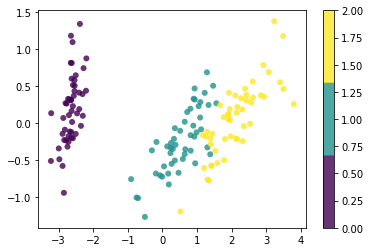

In [247]:
plt.scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1],
        c=y, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 3))
plt.colorbar()

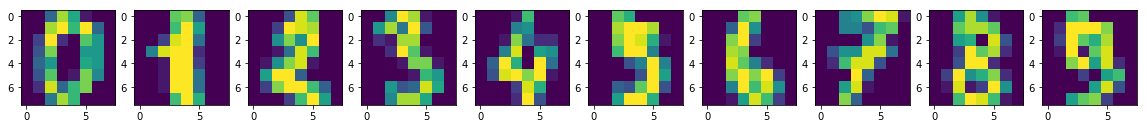

In [248]:
data = datasets.load_digits()

x = data.data
y = data.target

plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x[i].reshape((8,8)))

In [249]:
pca_scratch = PCA_scratch(64, 0.95)
pca_scratch.fit(x)
x_pca_digit = pca_scratch.transform(x)

In [251]:
eigenvalues = pca_scratch.return_eigenvalues()
eigenvectors = pca_scratch.return_components()

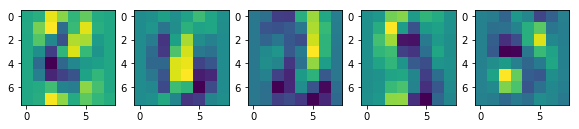

In [252]:
vectors = pca_digit.components_
values = pca_digit.explained_variance_

plt.figure(figsize=(20,10))
for i in range(5):
    plt.subplot(1,10,i+1)
    plt.imshow(eigenvalues[i] * eigenvectors[i].reshape((8,8)))

In [253]:
pca_digit = PCA(64)
pca_digit.fit(x)
x_pca_digit = pca_digit.transform(x)

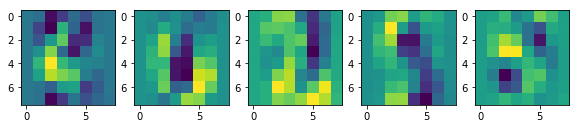

In [254]:
vectors = pca_digit.components_
values = pca_digit.explained_variance_

plt.figure(figsize=(20,10))
for i in range(5):
    plt.subplot(1,10,i+1)
    plt.imshow(values[i] * vectors[i].reshape((8,8)))